In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('../data/example_data.xlsx')

# Print the first 5 rows of the dataframe
print(df.head(n=10))


   xnat_id     Name   Age         City      Description  Unnamed: 5  Visit  \
0        1    Alice  25.0     New York     Loves hiking         NaN      1   
1        2      Bob  30.0  Los Angeles  Enjoys painting         NaN      1   
2        3  Charlie  35.0      Chicago     Plays guitar         NaN      2   
3        4    David  40.0      Houston    Writes poetry         NaN      1   
4        1    Alice  25.0     New York     Loves hiking         NaN      2   
5        3  Charlie  35.0      Chicago     Plays guitar         NaN      1   
6        4    David  40.0      Houston    Writes poetry         NaN      2   
7        1    Alice  25.0     New York     Loves hiking         NaN      2   
8        1    Alice  25.0     New York              NaN         NaN      3   
9        1    Alice  25.0     New York     Loves hiking         NaN      4   

              mri_date           blood_date  
0  2021-11-11 00:00:00  2021-11-13 00:00:00  
1  2020-10-02 00:00:00  2020-10-02 00:00:00  
2  

In [49]:
# df.groupby('Name')['mri_date'].min().reset_index()

<Axes: title={'center': 'Number of Observations per Subject'}, xlabel='Name'>

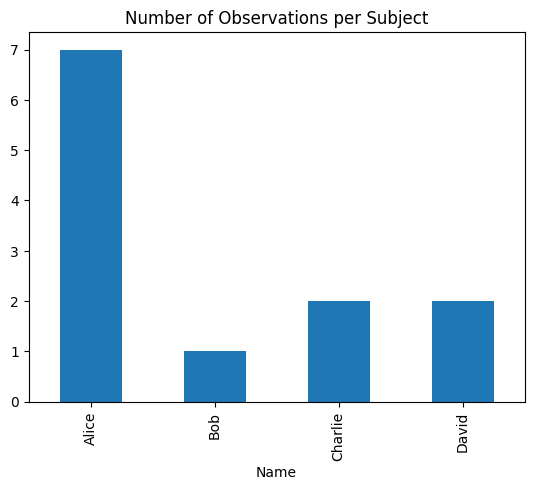

In [19]:
# histogram of of number of observations per subject
df.groupby('Name').size().plot(kind='bar', title='Number of Observations per Subject')
# histogram of age


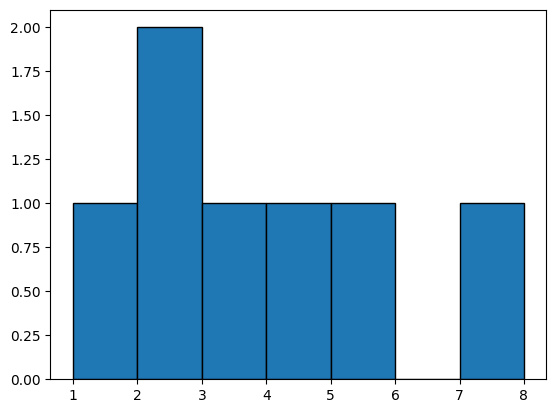

In [21]:
#plot histogram of Alices visits
alice_visits = df[df['Name'] == 'Alice']
plt.hist(alice_visits['Visit'], bins=len(alice_visits['Visit']), edgecolor='black')
plt.show()

In [25]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Sample data representing patient visits with missing values
# data = {
#     'Patient_ID': [1, 1, 1, 2, 2, 3, 3, 3],
#     'Visit_Day': [0, 1, 3, 0, 2, 0, 1, 4],
#     'BP': [120, np.nan, 125, 130, np.nan, np.nan, 110, 115],
#     'HR': [80, 85, np.nan, np.nan, 75, 70, np.nan, np.nan]
# }

# # Create a DataFrame
# df = pd.DataFrame(data)

# # Set up the figure and axis
# plt.figure(figsize=(10, 6))

# # Create a heatmap to visualize missing data
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=df['Patient_ID'])

# # Set labels and title
# plt.xlabel('Variables')
# plt.ylabel('Patient Visits')
# plt.title('Missing Data Visualization for Patient Visits')

# # Show the plot
# plt.show()



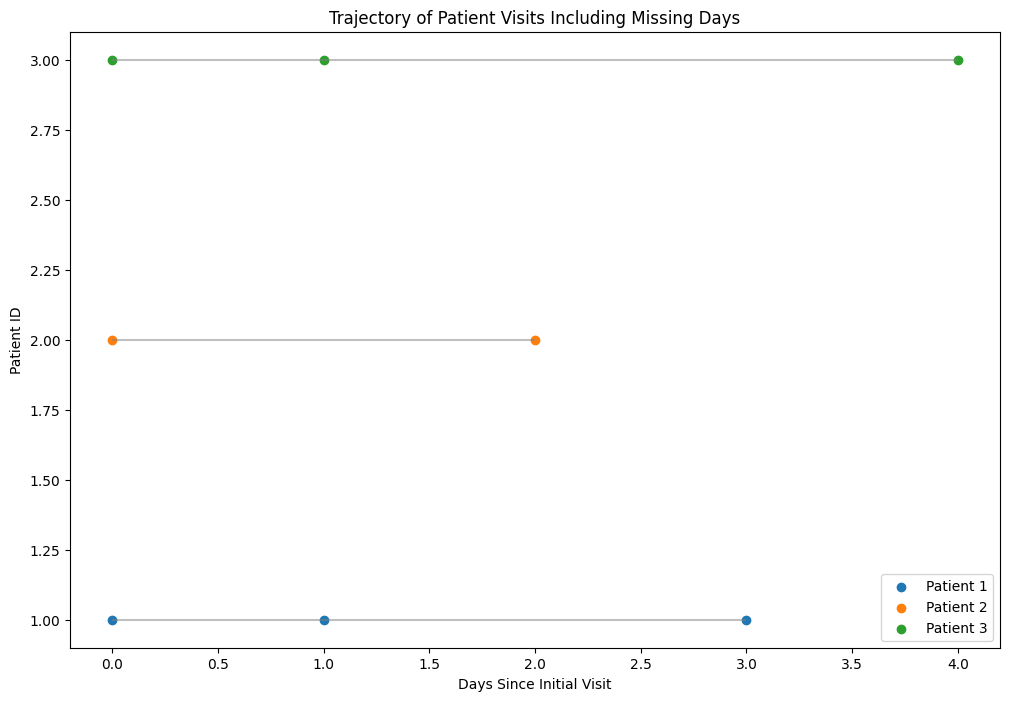

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data representing patient visits with missing values
data = {
    'Patient_ID': [1, 1, 1, 2, 2, 3, 3, 3],
    'Visit_Day': [0, 1, 3, 0, 2, 0, 1, 4],
    'BP': [120, np.nan, 125, 130, np.nan, np.nan, 110, 115],
    'HR': [80, 85, np.nan, np.nan, 75, 70, np.nan, np.nan]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a complete range of days for each patient
complete_days = df.groupby('Patient_ID')['Visit_Day'].apply(lambda x: pd.Series(range(x.min(), x.max() + 1)))

# Reset index to merge with the original DataFrame
complete_days = complete_days.reset_index(level=0).reset_index(drop=True)
complete_days.columns = ['Patient_ID', 'Visit_Day']

# Merge with the original DataFrame to include missing days
df_complete = pd.merge(complete_days, df, on=['Patient_ID', 'Visit_Day'], how='left')

# Create a horizontal bar chart to show the trajectory of patient visits
plt.figure(figsize=(12, 8))

# for patient_id in df_complete['Patient_ID'].unique():
#     patient_data = df_complete[df_complete['Patient_ID'] == patient_id]
#     plt.hlines(y=patient_id, xmin=patient_data['Visit_Day'].min(), xmax=patient_data['Visit_Day'].max(), color='grey', alpha=0.5)
#     plt.scatter(patient_data['Visit_Day'], [patient_id] * len(patient_data), label=f'Patient {patient_id}')

for patient_id in df['Patient_ID'].unique():
    patient_data = df[df['Patient_ID'] == patient_id]
    plt.hlines(y=patient_id, xmin=patient_data['Visit_Day'].min(), xmax=patient_data['Visit_Day'].max(), color='grey', alpha=0.5)
    plt.scatter(patient_data['Visit_Day'], [patient_id] * len(patient_data), label=f'Patient {patient_id}')


plt.xlabel('Days Since Initial Visit')
plt.ylabel('Patient ID')
plt.title('Trajectory of Patient Visits Including Missing Days')
plt.legend()
plt.show()



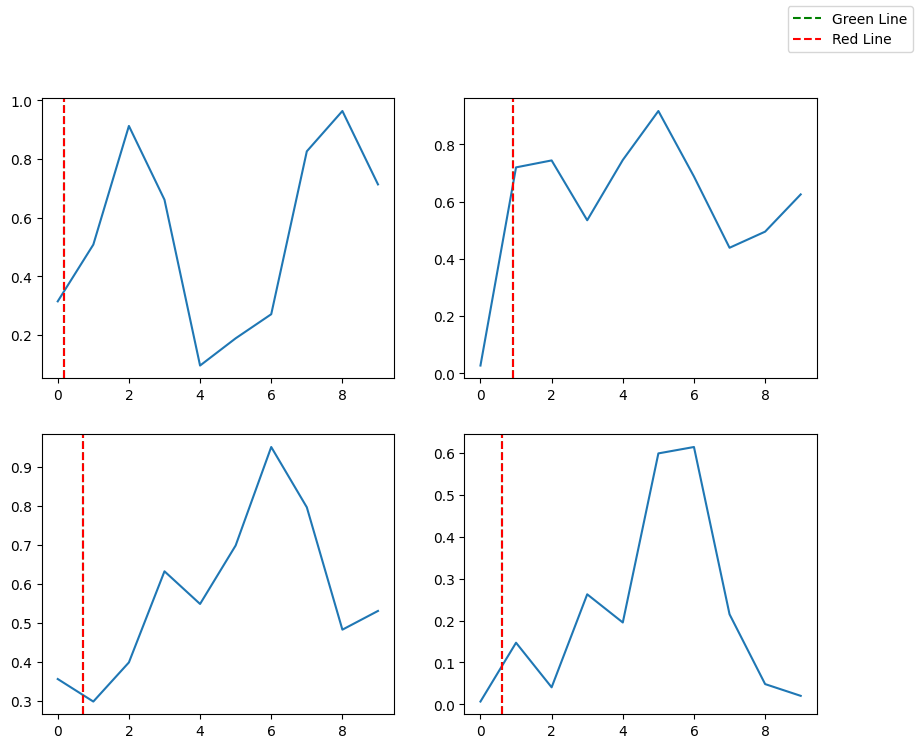

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
data = np.random.rand(4, 10)
x_var = 5

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data and add vertical lines
for i in range(2):
    for j in range(2):
        axs[i, j].plot(data[i * 2 + j])
        axs[i, j].axvline(x=data[i * 2 + j][x_var], color='g', linestyle='--')
        axs[i, j].axvline(x=data[i * 2 + j][x_var], color='r', linestyle='--')

# Add legend for vertical lines
green_line = plt.Line2D([], [], color='g', linestyle='--', label='Green Line')
red_line = plt.Line2D([], [], color='r', linestyle='--', label='Red Line')
fig.legend(handles=[green_line, red_line], loc='upper right')

# Show plot
plt.show()
